#### Part A:Exploratory Data Analysis (EDA)


In [219]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg
from sklearn.model_selection import cross_val_score

In [3]:
# 1. Loading the dataset and displaying the first 5 rows
df=pd.read_csv (r"E:\LuxDev Tech DA_DS Track\Files - Assignments & Notes\Machine Learning\ai_assistant_usage_student_life.csv")
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [4]:
#2. Checking dataset shape
df.shape

(10000, 11)

In [90]:
#3. Display column names and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   SessionID                10000 non-null  object        
 1   StudentLevel             10000 non-null  int64         
 2   Discipline               10000 non-null  object        
 3   SessionDate              10000 non-null  datetime64[ns]
 4   SessionLengthMin         10000 non-null  float64       
 5   TotalPrompts             10000 non-null  int64         
 6   TaskType                 10000 non-null  object        
 7   AI_AssistanceLevel       10000 non-null  int64         
 8   FinalOutcome             10000 non-null  object        
 9   UsedAgain                10000 non-null  bool          
 10  SatisfactionRating       10000 non-null  float64       
 11  Year                     10000 non-null  int32         
 12  Month                    10000 no

In [6]:
#4. Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)
#Based on the output below, there are no missing values in the dataset

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64


In [7]:
#5. Summary statistics for SessionLengthMin and TotalPrompts
print(df[["SessionLengthMin", "TotalPrompts"]].describe())

       SessionLengthMin  TotalPrompts
count      10000.000000  10000.000000
mean          19.846467      5.607500
std           13.897302      4.648764
min            0.030000      1.000000
25%            9.630000      2.000000
50%           16.650000      4.000000
75%           26.670000      8.000000
max          110.810000     39.000000


In [8]:
df["TotalPrompts"].describe()

count    10000.000000
mean         5.607500
std          4.648764
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         39.000000
Name: TotalPrompts, dtype: float64

In [9]:
#6. Unique values in StudentLevel, Discipline & TaskType
print(f"Unique Values in StudentLevel:", df["StudentLevel"].unique())
print(f"Unique Values in Discipline:", df["Discipline"].unique())
print(f"Unique Values in TaskType:", df["TaskType"].unique())

Unique Values in StudentLevel: ['Undergraduate' 'Graduate' 'High School']
Unique Values in Discipline: ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
Unique Values in TaskType: ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']


In [10]:
#7. Most common TaskType
df.value_counts(df["TaskType"])
#Most common task type is writing with the highest count

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [11]:
#8. Average SessionLengthMin for each StudentLevel
average_session_by_level= df.groupby("StudentLevel")["SessionLengthMin"].mean().round(2)

print ("Average session length in minutes by student level:")
print (average_session_by_level)

Average session length in minutes by student level:
StudentLevel
Graduate         20.25
High School      20.02
Undergraduate    19.65
Name: SessionLengthMin, dtype: float64


#### Part B: Visualization

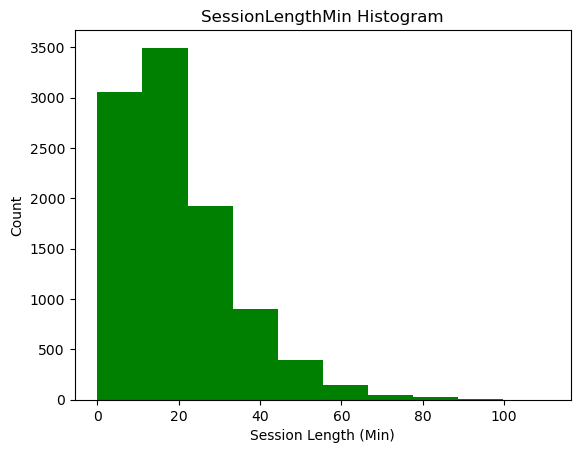

In [12]:
#9. Histogram of SessionLengthMin
plt.hist(df["SessionLengthMin"], bins=10, color='green')
plt.title("SessionLengthMin Histogram")
plt.xlabel("Session Length (Min)")
plt.ylabel("Count")
plt.show()

In [13]:
session_count_by_student_level=df["StudentLevel"].value_counts()
print(session_count_by_student_level)

StudentLevel
Undergraduate    5978
High School      2027
Graduate         1995
Name: count, dtype: int64


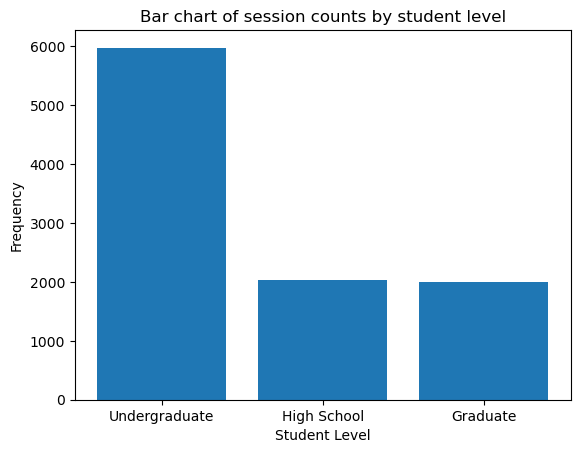

In [14]:
#10. Bar chart of session counts by student level
plt.Figure(figsize=(5, 3))
plt.bar(session_count_by_student_level.index, session_count_by_student_level.values)
plt.title("Bar chart of session counts by student level")
plt.xlabel("Student Level")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Frequency')

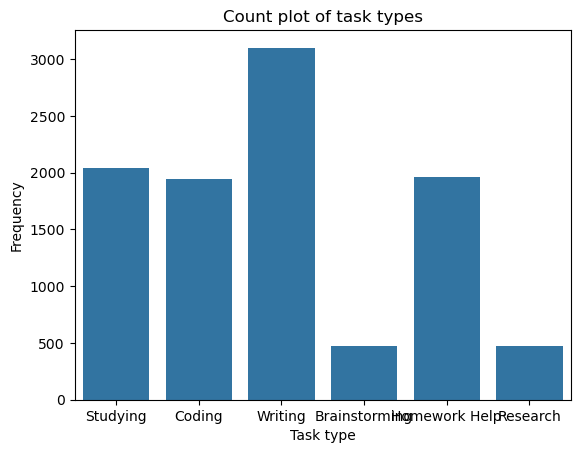

In [15]:
#11. Countplot of TaskType using Seaborn
plt.Figure(figsize=(6, 3))
sns.countplot(x='TaskType', data=df)
plt.title("Count plot of task types")
plt.xlabel("Task type")
plt.ylabel("Frequency")


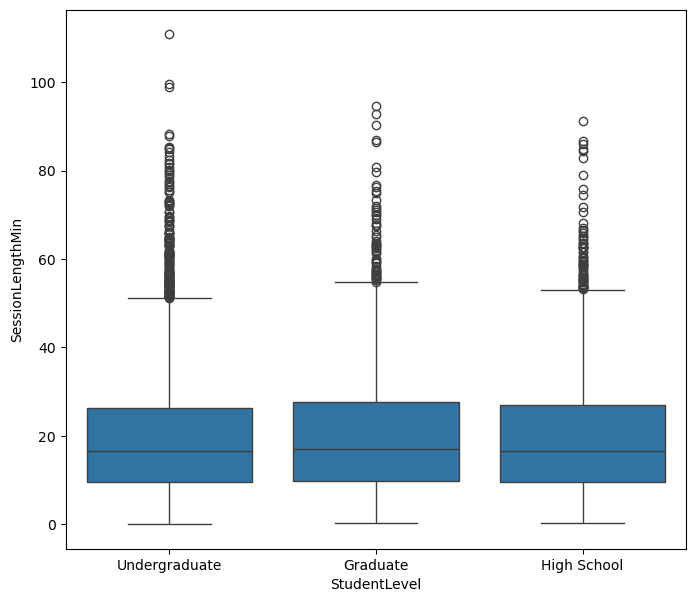

In [16]:
#12. Boxplot of session length in min grouped by student level
fig = plt.figure(figsize=(8, 7))
sns.boxplot(x="StudentLevel", y="SessionLengthMin", data=df)
plt.show()

In [17]:
# 13. Create a pie chart showing proportions of final outcome
Final=df["FinalOutcome"].value_counts()
print(Final)

FinalOutcome
Assignment Completed    4768
Idea Drafted            2866
Confused                1613
Gave Up                  753
Name: count, dtype: int64


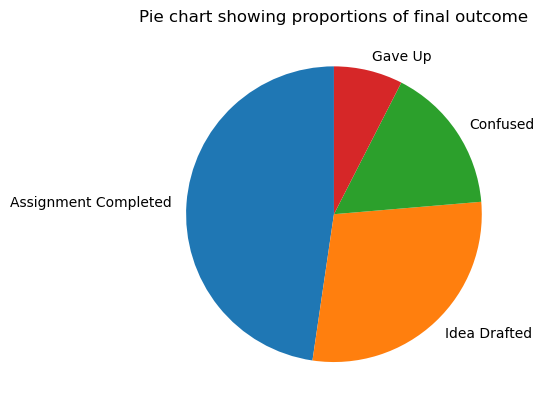

In [18]:
y=Final
pielabels= ["Assignment Completed", "Idea Drafted", "Confused", "Gave Up"]
plt.title("Pie chart showing proportions of final outcome")
plt.pie(y, labels=pielabels, startangle = 90)
plt.show()

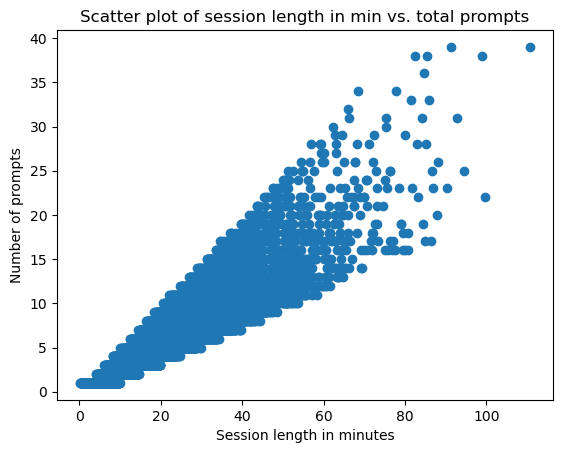

In [19]:
# 14.  A scatterplot of SessionLengthMin vs. TotalPrompts.
x= df["SessionLengthMin"]
y= df["TotalPrompts"]

plt.scatter(x, y)
plt.xlabel("Session length in minutes")
plt.ylabel("Number of prompts")
plt.title("Scatter plot of session length in min vs. total prompts")
plt.show()

In [20]:
# 15. A line chart of average AI_AssistanceLevel over time (SessionDate).
average_ai_assistance_level = df.groupby("SessionDate")["AI_AssistanceLevel"].mean()
print(average_ai_assistance_level)

SessionDate
2024-06-24    3.451613
2024-06-25    3.181818
2024-06-26    3.500000
2024-06-27    3.428571
2024-06-28    3.826087
                ...   
2025-06-20    3.459459
2025-06-21    3.146341
2025-06-22    3.200000
2025-06-23    3.272727
2025-06-24    3.515152
Name: AI_AssistanceLevel, Length: 366, dtype: float64


In [21]:
#Converting dates to datetime
df["SessionDate"]=pd.to_datetime(df["SessionDate"])

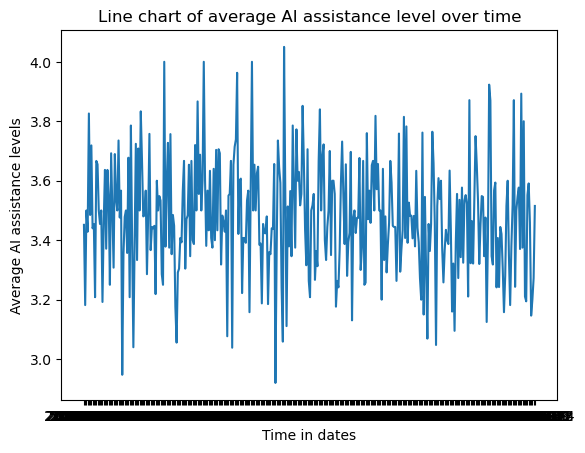

In [22]:
plt.plot(average_ai_assistance_level.index, average_ai_assistance_level.values)
plt.xlabel("Time in dates")
plt.ylabel("Average AI assistance levels")
plt.title("Line chart of average AI assistance level over time")
plt.show()


In [23]:
#Create a heatmap of correlations among numeric feature
numeric_features=df[["SessionLengthMin", "TotalPrompts", "AI_AssistanceLevel", "SatisfactionRating"]]
numeric_features.head(5)

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
0,31.20,11,2,1.0
1,13.09,6,3,2.0
2,19.22,5,3,3.3
3,3.70,1,3,3.5
4,28.12,9,3,2.9


<Axes: >

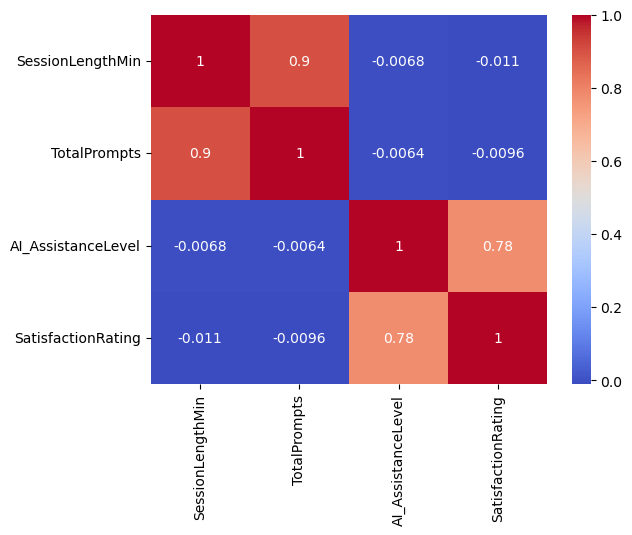

In [26]:
numeric_features_corr= numeric_features.corr()
sns.heatmap(numeric_features_corr, cmap= 'coolwarm', annot=True)

#### Part C: GroupBy & Aggregations

In [29]:
# 17. Average session length min for each tasktype
avg_sessionlength_per_task= df.groupby("TaskType")["SessionLengthMin"].mean().round(3)
print(avg_sessionlength_per_task)

TaskType
Brainstorming    21.964
Coding           19.468
Homework Help    19.941
Research         20.410
Studying         19.706
Writing          19.706
Name: SessionLengthMin, dtype: float64


In [ ]:
# 18. Discipline with the most sessions
discipline_most_sessions = df["Discipline"].value_counts().idxmax()
print("Discipline with the most sessions is:", discipline_most_sessions)
print("The number of sessions is:", (df["Discipline"].value_counts().max()))


Discipline with the most sessions is: Biology
The number of sessions is: 1458


In [37]:
# 19. Average AI_Assistance level across student level
Average_AI_asisstance_by_studentlevel= df.groupby("StudentLevel")["AI_AssistanceLevel"].mean()
print(Average_AI_asisstance_by_studentlevel)

StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64


In [ ]:
# 20. Most common final outcome for graduate students
graduate_final_outcomes = df[df['StudentLevel'] == 'Graduate']['FinalOutcome'].value_counts()
most_common_outcome = graduate_final_outcomes.idxmax()
count = graduate_final_outcomes.max()
print(f"Most common result for graduate students: {most_common_outcome} ({count} students)")

Most common result for graduate students: Assignment Completed (936 students)


In [ ]:
# 21. Median session length min for each final outcome
median_session_length= df.groupby("FinalOutcome")["SessionLengthMin"].median()
print(median_session_length)

FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64


#### Part D: Feature Engineering & Encoding


In [58]:
# 22. Convert SessionDate into Year, Month, and Day columns
df['SessionDate'] = pd.to_datetime(df['SessionDate'])

df['Year'] = df['SessionDate'].dt.year
df['Month'] = df['SessionDate'].dt.month
df['Day'] = df['SessionDate'].dt.day

print(df['SessionDate'])

0      2024-11-03
1      2024-08-25
2      2025-01-12
3      2025-05-06
4      2025-03-18
          ...    
9995   2024-07-20
9996   2024-11-11
9997   2024-09-11
9998   2024-10-27
9999   2025-04-16
Name: SessionDate, Length: 10000, dtype: datetime64[ns]


In [ ]:
#23. Encoding student level using label encoding

#Initializing and fitting the LabelEncoder
le = LabelEncoder() #for converting categorical data into numerical format for easy operation with ML models 
df["StudentLevel"] = le.fit_transform(df["StudentLevel"])

print(df["StudentLevel"])
print("Student level encoded:", le.classes_)

0       2
1       2
2       2
3       2
4       2
       ..
9995    2
9996    1
9997    2
9998    2
9999    2
Name: StudentLevel, Length: 10000, dtype: int64
Student level encoded: [0 1 2]


In [65]:
#24. One-hot encoding Task type
df_tasktype_encoded = pd.get_dummies(df, columns=["TaskType"])
df_tasktype_encoded.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,2,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,False,False,False,False,True,False
1,SESSION00002,2,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,False,False,False,False,True,False
2,SESSION00003,2,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,False,True,False,False,False,False
3,SESSION00004,2,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,False,True,False,False,False,False
4,SESSION00005,2,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,False,False,False,False,False,True


In [67]:
#25. New feature: PromptsPerMinute = TotalPrompts / SessionLengthMin.
df["PromptsPerMinute"]= (df["TotalPrompts"] / df["SessionLengthMin"]).round(4)
df.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,PromptsPerMinute
0,SESSION00001,2,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,0.3526
1,SESSION00002,2,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,0.4584
2,SESSION00003,2,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,0.2601
3,SESSION00004,2,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,0.2703
4,SESSION00005,2,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,0.3201


In [82]:
#26. Bin SessionLengthMin into categories: Short, Medium, Long.
df["SessionLengthCategories"]= pd.cut(df["SessionLengthMin"], bins=[0, 40, 80, 120], labels=["Short", "Medium", "Long"])
df.head(5)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,PromptsPerMinute,SessionLengthCategories
0,SESSION00001,2,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,0.3526,Short
1,SESSION00002,2,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,0.4584,Short
2,SESSION00003,2,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,0.2601,Short
3,SESSION00004,2,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,0.2703,Short
4,SESSION00005,2,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,0.3201,Short


In [89]:
print(df[["SessionLengthMin", "SessionLengthCategories"]])

      SessionLengthMin SessionLengthCategories
0                31.20                   Short
1                13.09                   Short
2                19.22                   Short
3                 3.70                   Short
4                28.12                   Short
...                ...                     ...
9995             28.41                   Short
9996             13.98                   Short
9997             10.78                   Short
9998             30.88                   Short
9999             10.85                   Short

[10000 rows x 2 columns]


#### Part E: Machine Learning (Classification Models)


In [121]:
# 27. Predicting Final Outcome using DecisionTree Classifier
#Defining the features and target
X=df.drop(["SessionID", "SessionDate", "FinalOutcome"], axis=1) #Isolating the target variable from the features
y= df["FinalOutcome"]

In [123]:
#Encoding the target (Final outcome with four categories) to work easily with the data
le= LabelEncoder()
y= le.fit_transform(df["FinalOutcome"])

In [124]:
le= LabelEncoder()
X = pd.get_dummies(X, drop_first=True)

In [125]:
#Data splitting
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size=0.2, random_state=42)

In [127]:
#Training the decision tree
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

#Predicting
y_pred= tree.predict(X_test)
print(y_pred)

[0 3 0 ... 0 3 0]


In [147]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.7445

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55       615
           1       0.79      0.85      0.82      1385

    accuracy                           0.74      2000
   macro avg       0.70      0.68      0.69      2000
weighted avg       0.73      0.74      0.74      2000


Confusion Matrix:
 [[ 310  305]
 [ 206 1179]]


In [ ]:
28. #Predict UsedAgain using Logistic Regression.

#Defining features and the target
X = df.drop(["UsedAgain", "SessionID", "SessionDate"], axis=1)
y = df["UsedAgain"]

In [ ]:
#Encoding the UsedAgain column since it has categorical data
le = LabelEncoder()
y = le.fit_transform(y)

#Encoding  categorical features
X = pd.get_dummies(X, drop_first=True)

In [142]:
# Train/test data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
#Predicting UsedAgain
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Accuracy: 0.7445

Confusion Matrix:
 [[ 310  305]
 [ 206 1179]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55       615
           1       0.79      0.85      0.82      1385

    accuracy                           0.74      2000
   macro avg       0.70      0.68      0.69      2000
weighted avg       0.73      0.74      0.74      2000

ROC AUC Score: 0.6764016318863548


In [174]:
#29. Predicting FinalOutcome using a Random Forest Classifier
Xrandom=df.drop(["FinalOutcome", "SessionID", "SessionDate"], axis=1)
yrandom=df["FinalOutcome"]

encode=LabelEncoder()
yrandom= encode.fit_transform(yrandom) 

Xrandom=pd.get_dummies(Xrandom, drop_first=True)

#Splitting & training the dataset
X_train,X_test, y_train, y_test=train_test_split(Xrandom,yrandom, test_size=0.2, random_state=42)

#train random forest classifier
randomforest= RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_train,y_train)

#make predictions
y_pred=randomforest.predict(X_test)

In [175]:
#Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4605

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.76      0.61       930
           1       0.37      0.26      0.30       349
           2       0.23      0.04      0.06       170
           3       0.33      0.22      0.27       551

    accuracy                           0.46      2000
   macro avg       0.36      0.32      0.31      2000
weighted avg       0.42      0.46      0.42      2000


Confusion Matrix:
 [[704  65   8 153]
 [191  89  11  58]
 [ 84  44   6  36]
 [385  43   1 122]]


In [149]:
#30. Classifying UsedAgain using K-Nearest Neighbors (KNN)
le= LabelEncoder()
df_used_again_encoded= le.fit_transform(df["UsedAgain"])

In [164]:
X=df.drop(["UsedAgain", "SessionID", "SessionDate"], axis=1)
y= df_used_again_encoded

X= pd.get_dummies (X, drop_first=True)

scaler=StandardScaler()
X_scaled= scaler.fit_transform(X)

In [166]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [167]:
#Training the model
KNN= KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train,y_train)


#Predicting the target
y_pred = KNN.predict(X_test)

In [168]:
#Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.652

Confusion Matrix:
 [[  90  525]
 [ 171 1214]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.15      0.21       615
           1       0.70      0.88      0.78      1385

    accuracy                           0.65      2000
   macro avg       0.52      0.51      0.49      2000
weighted avg       0.59      0.65      0.60      2000



In [ ]:
#31. Predicting FinalOutcome using a Naive Bayes Classifier
X=df.drop(["FinalOutcome", "SessionID", "SessionDate"], axis=1)
y= df["FinalOutcome"]




In [228]:
X= pd.get_dummies (X, drop_first=True)
y= encode.fit_transform(y)

In [229]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
#Training and testing
Naive= GaussianNB()
Naive.fit(X_train, y_train)
yNaive_pred=Naive.predict(X_test)

In [ ]:
#Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [196]:
#32. Gradient Boosting Classifier for UsedAgain
# Defining target and features
X = df.drop(["UsedAgain", "SessionDate"],axis=1)
y = df["UsedAgain"]

#Encoding target and features
le = LabelEncoder()
y= le.fit_transform(y)  

X = pd.get_dummies(X, drop_first=True)




In [197]:
# Train/test split; model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Gradient boosting classifier
gb= GradientBoostingClassifier(n_estimators=300, random_state=100, max_features=5)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=5, n_estimators=300, random_state=100)

In [198]:
#Predictions & Evaluations
y_pred = gb.predict(X_test)

# Step 7: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6925

Confusion Matrix:
 [[   0  615]
 [   0 1385]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       615
           1       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000



c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [217]:
#33. Predicting FinalOutcome using XGBoost Classifier
# Defining target and features
X = df.drop(["FinalOutcome", "SessionDate"], axis=1)
y = df["FinalOutcome"]

#Encoding target and features
le = LabelEncoder()
y= le.fit_transform(y)  

X = pd.get_dummies(X, drop_first=True)




In [218]:
#Train/test split; model training
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


model= xg.XGBRegressor(n_estimators=10)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

In [213]:
#Prediction and Evaluation
y_pred= model.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 1.610583782196045
RMSE: 1.269087775607363


In [ ]:
#34-36 
#Models previously used in predicting different metrics with classification reports, accuracy score and confusion matrix include the Random Forest Classifier, Decision Tree Classifier, Naive Bayes and XGBoost Classifiers